In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# use inspector to explore the database and print table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Get a list of column names and types table 'measurement'
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Get a list of column names and types table 'station'
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
latest_date

'2017-08-23'

In [14]:
latest_date_obj = datetime.strptime(latest_date, '%Y-%m-%d')
latest_date_obj

datetime.datetime(2017, 8, 23, 0, 0)

In [15]:
from dateutil.relativedelta import relativedelta

In [16]:
last_year_date = (latest_date_obj - relativedelta(years=1)). strftime("%Y-%m-%d")
last_year_date

'2016-08-23'

In [17]:
prcp_12_last = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= last_year_date).filter(Measurement.date <= latest_date).order_by(Measurement.date).all()
prcp_12_last

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

# create a datetime object of latest_date
latest_date_obj = datetime.strptime(latest_date, '%Y-%m-%d')

from dateutil.relativedelta import relativedelta
last_year_date = (latest_date_obj - relativedelta(years=1)). strftime("%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
prcp_12_last = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= last_year_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(prcp_12_last, columns=['date', 'precipitation'])

# Sort the dataframe by date
df = results_df.set_index('date').sort_values(by=['date'])
df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


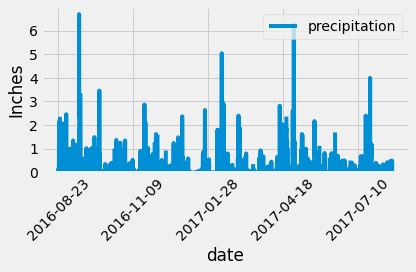

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

# label y axis, limits and step
plt.ylabel("Inches")
plt.ylim(0,7)
plt.yticks(np.arange(0, 7, 1))

# rotate xticks
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("Images/Precipitation.png")
plt.show()


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).count()
station_count

9

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
              order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
results_stations =  session.query(Station.station).all()
results_stations

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [24]:
stations_list = list(np.ravel(results_stations))
stations_list

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
              filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [26]:
station_max = session.query(Measurement.station, func.max(Measurement.tobs)).all()
station_max

[('USC00519397', 87.0)]

In [27]:
station_max = session.query(Measurement.station, func.max(Measurement.tobs)).all()[0][0]
station_max

'USC00519397'

In [28]:
# Using the most active station id
station_max = session.query(Measurement.station, func.max(Measurement.tobs)).all()[0][0]

# Query the last 12 months of temperature observation data for this station
max_results = session.query(Measurement.tobs).filter(Measurement.station == station_max).\
                                          filter(Measurement.date >= last_year_date).order_by(Measurement.date).all()
max_results          

[(81.0,),
 (79.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (80.0,),
 (81.0,),
 (80.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (76.0,),
 (76.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (79.0,),
 (80.0,),
 (79.0,),
 (81.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (82.0,),
 (81.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (80.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (76.0,),
 (75.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (80.0,),
 (81.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (72.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (76.0,),
 (75.0,),
 (68.0,),
 (75.0,),


In [29]:
max_results_df = pd.DataFrame(max_results)
max_results_df.head()

,0
0,81.0
1,79.0
2,80.0
3,79.0
4,77.0


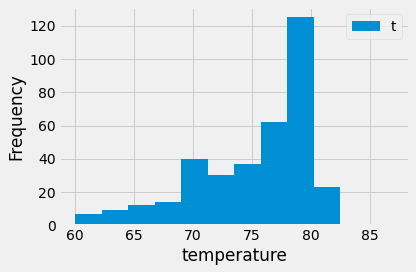

In [30]:
# plot the results into histogram
max_results_df.plot.hist(bins=12)
plt.legend("t")
plt.xlabel("temperature")
plt.tight_layout()
plt.savefig("Images/Station-histogram.png")
plt.show()

# Close session

In [31]:
# Close Session
session.close()